In [1]:
import numpy as np
import os
import math
#import cv2
from pylab import plt
import scipy.stats as sts

In [2]:
a = os.listdir(".")
def csv_gen(path):
    return ( i for i in np.genfromtxt(path, delimiter=','))

def fname_iter(directory):
    return (d for d in os.listdir(directory))
def img_iter(directory):
    im_exts = ['png','jpg','jpeg' ]
    for path in fname_iter(directory):
        if path.split('.')[-1] in im_exts:
            im = cv2.imread(path,mode='RGB')
            yield im

data_path = [
    './data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD1.csv'
    ,'./data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD2.csv'
]

In [3]:
def read_csv_data(filepath):
    d = np.genfromtxt(filepath,delimiter=',')
    return d

data = [
    read_csv_data(p) for p in data_path
]

In [4]:
plt.plot(X_1, Y_1)

NameError: name 'X_1' is not defined

In [5]:
X_1 = np.array([data[0][i][1] for i in range(len(data[0]))])[600:]
X_2 = np.array([data[1][i][1] for i in range(len(data[1]))])[600:]

In [6]:
Y_1 = np.array([data[0][i][0] for i in range(len(data[0]))])[600:]
Y_2 = np.array([data[1][i][0] for i in range(len(data[1]))])[600:]

In [7]:
X_1 = (X_1 - X_1[0])/(X_1[len(X_1)-1]-X_1[0])*2*3.1415
X_2 = (X_2 - X_2[0])/(X_2[len(X_2)-1]-X_2[0])*2*3.1415

In [8]:
def get_koef(phi, h, X, Y):
    sigma = 0
    mu = 0
    n = 0
    mu = Y[abs(X-phi)<h].mean()
    sigma = Y[abs(X-phi)<h].std()
    return mu, sigma

In [9]:
def learning_proces(X_1, Y_1, X_2, Y_2, h):
    phis = np.linspace(0, 2*3.1415, math.floor(3.1415/h))
    mu_1 = np.zeros(len(phis))
    sigma_1 = np.zeros(len(phis))
    mu_2 = np.zeros(len(phis))
    sigma_2 = np.zeros(len(phis))
    for i in range(len(phis)):
        mu_1[i] , sigma_1[i] = get_koef(phis[i], h, X_1, Y_1)
        mu_2[i], sigma_2[i] = get_koef(phis[i], h, X_2, Y_2)
    return phis, mu_1, mu_2, sigma_1, sigma_2

In [10]:
def count_metrics(mu_1, sigma_1,mu_2, sigma_2, Y):
    r = 0
    for y in Y:
        r -= float((y[0]-mu_1)**2/2/sigma_1**2)
        r -= float((y[1]-mu_2)**2/2/sigma_2**2)
    return float(r)

In [11]:
def make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2):
    ans = 0
    prob = count_metrics(mu_1[0], sigma_1[0],mu_2[0], sigma_2[0], Y)
    for i in range( len(mu_1)):
        a = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
        if a > prob:
            ans = phis[i]
            prob = a
    probability = np.zeros(len(phis))
    for i in range(len(phis)):
        probability[i] = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
    return ans, prob/len(Y), probability

In [12]:
%%time
phis, mu_1, mu_2, sigma_1, sigma_2 = learning_proces(np.array(X_1), np.array(Y_1), np.array(X_2), np.array(Y_2), 0.2)

CPU times: user 4.49 ms, sys: 1.51 ms, total: 6 ms
Wall time: 4.77 ms


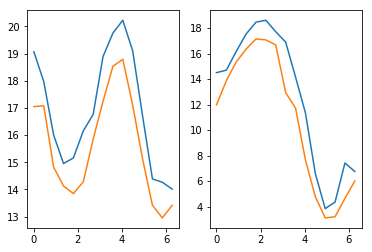

In [13]:

plt.subplot(1,2,1)
plt.plot(phis, np.array(mu_1)+np.array(sigma_1))
plt.plot(phis, np.array(mu_1)-np.array(sigma_1))

plt.subplot(1,2,2)

plt.plot(phis, np.array(mu_2)+np.array(sigma_2))
plt.plot(phis, np.array(mu_2)-np.array(sigma_2))

In [14]:
def make_test(n, x, model, sigma, model_1):
    return [[float(sts.norm(model(x), sigma).rvs(1)),float(sts.norm(model_1(x), sigma).rvs(1))]  for i in range(10)]






phi_test = np.linspace(0, 2*3.1415, 100)
answers = np.zeros(len(phi_test))
for i in range(len(phi_test)):
    answers[i], proba, probability = make_prediction(, phis, mu_1, mu_2, sigma_1, sigma_2)
plt.plot(phi_test, answers)  

SyntaxError: invalid syntax (<ipython-input-14-089f68866368>, line 12)

In [15]:
sts.norm(13,1).rvs((10))

array([13.62270487, 13.97576881, 12.93406139, 12.84201922, 12.21814506,
       12.1606877 , 12.49159518, 14.13151376, 11.99797227, 14.45816236])

In [16]:
Y = np.zeros((10,2))

In [17]:
for i in range(10):
    Y[i][0] = sts.norm(19.5,1).rvs(1)
    Y[i][1] = sts.norm(8,1).rvs(1)

In [18]:
Y

array([[19.40451805,  7.05910655],
       [19.53782744,  7.94591998],
       [18.92701807,  8.29474675],
       [17.82017495,  7.15778441],
       [19.44024227,  6.8712316 ],
       [19.02268866, 10.11049042],
       [19.44144478,  7.40704094],
       [21.17181925,  6.85939923],
       [20.00089313,  9.29687135],
       [18.82619756,  7.67254188]])

In [19]:
ans, proba, probability = make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2)

In [20]:
ans

4.039071428571429

In [21]:
proba

-1.2205854653963333

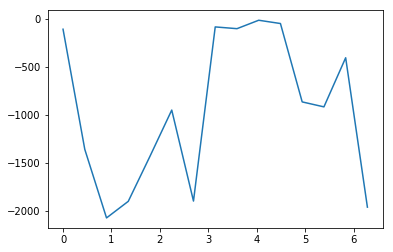

In [22]:
plt.plot(phis, probability)

In [23]:
sigma_1.mean()

0.6591411520662281

In [24]:

from gauss_est import gauss_est

In [25]:
X = [np.array(X_1), np.array(X_2)]
Y = [np.array(Y_1), np.array(Y_2)]

In [26]:
estimator = gauss_est(0.1)

In [27]:
estimator.fit(X, Y)

In [28]:
Y = []
Y.append(sts.norm(19.5,1).rvs(10))
Y.append(sts.norm(8,1).rvs(10))

In [29]:
ans, proba = estimator.predict(Y)

2
-93.822220029137
-93.822220029137
-277.60400698429055
-805.5255297546825
-360.72966287596114
-727.8244524751528
-1163.329912571463
-882.0280530415316
-4710.3161473025775
-661.0707504408097
-9597.850316422313
-559.6617254285502
-1516.5945041057983
-731.7940114516299
-1401.2494701827263
-800.5409756430602
-100.96873659368512
-343.1520993013606
-127.80160675590349
-98.86472669876622
-23.508568518213906
-5.984646647942386
-42.034490623654726
-72.78721753979436
-300.113098190997
-627.206290316373
-878.0565891131332
-1150.547238120994
-356.4705381957655
-282.3951568690733
-408.41344108445014
-629.278780252955


In [30]:
ans

4.188666666666666

In [31]:
proba


-5.984646647942386